In [2]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss, precision_recall_curve
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [3]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [4]:
# import state data => no header, so you have to specify header=None
y_name = ["state"]
y_train = pd.read_csv("./y_train.csv", names=y_name, header=None)
y_val = pd.read_csv("./y_val.csv", names=y_name, header=None)

In [5]:
# flatten 1-column dataframe into series
y_train = y_train['state']
y_val = y_val['state']

In [39]:
y_train_new = y_train.map(dict(failed=1,successful=0))

In [40]:
#Import Library
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object (using linearsvc to handle large number of instances better)
svm = svm.LinearSVC(dual=False,max_iter=10000)
clf = CalibratedClassifierCV(svm)

# LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     # intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     # multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     # verbose=0)

In [23]:
# from sklearn.svm import SVC
# clf = SVC()

In [41]:
clf.fit(x_train, y_train_new)
# clf.score(x_train[vals], y_train)
#Predict Output
# predicted= model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv='warn', method='sigmoid')

In [10]:
# predictions and probabilities
training_predictions = clf.predict(x_train)
predictions = clf.predict(x_val)
probabilities = clf.predict_proba(x_val)

# importance of each feature
# list(zip(x_train, clf.feature_importances_))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/calibration.py:520: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/calibration.py:520: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/calibration.py:520: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/calibration.py:520: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/calibration.py:520: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.

In [11]:
# training and validation accuracy
print ("Training Accuracy: ", accuracy_score(y_train, training_predictions))
print ("Validation Accuracy: ", accuracy_score(y_val, predictions))
# training and validation balanced accuracy
print ("Training Balanced Accuracy: ", balanced_accuracy_score(y_train, training_predictions))
print ("Validation Balanced Accuracy: ", balanced_accuracy_score(y_val, predictions))

Training Accuracy:  0.676746815406648
Validation Accuracy:  0.6700836662395417
Training Balanced Accuracy:  0.6335282077569226
Validation Balanced Accuracy:  0.6262470928858602


Text(0.5,1,'Confusion Matrix - LinearSVC')

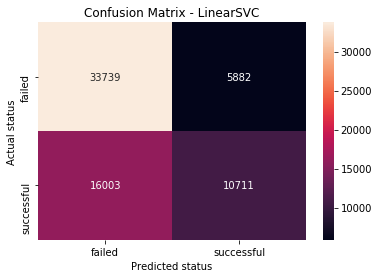

In [51]:
# best confusion matrix depiction using seaborn heatmap
cm = confusion_matrix(y_val, predictions)
class_names = y_val.unique()
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Confusion Matrix - LinearSVC')

In [43]:
# classification report with relevant statistics
# cr = classification_report(y_val, predictions)
# print(cr)

In [16]:
print("Log loss: ", log_loss(y_val, probabilities))

Log loss:  0.6091465406851259


In [44]:
# get probabilities for the positive class (second column in probabilities)
positive_probabilities = probabilities[:,1]
# is over 0.5 - which is the standard for a no-skill model
print("ROC_AUC score: ", roc_auc_score(y_val, positive_probabilities))

ROC_AUC score:  0.7167976768358145


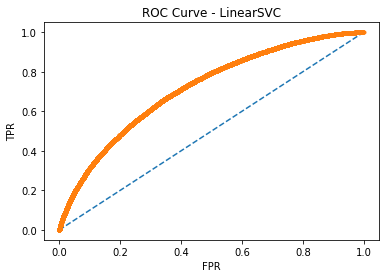

In [49]:
# our dataset is balanced - this one is better
# plot ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fpr, tpr, thresholds = roc_curve(y_val, positive_probabilities, pos_label="successful")
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve - LinearSVC")
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

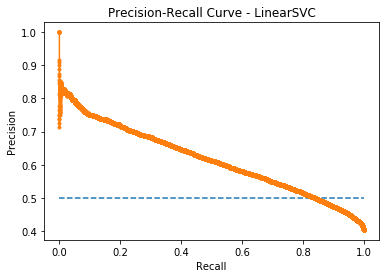

In [48]:
# plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, positive_probabilities, pos_label="successful")
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve - LinearSVC")
plt.xlabel("Recall")
plt.ylabel("Precision")
# show the plot
plt.show()